### Arash Latifi
### Dec 2022

In [254]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image

## Load the Data

In [130]:
(train_X_orig, train_y_orig), (test_X_orig, test_y_orig) = mnist.load_data()

## Normalize Input

In [131]:
train_X = train_X_orig.reshape((train_X_orig.shape[0], 28, 28, 1)).astype('float32')
train_X = train_X/255.
test_X = test_X_orig.reshape((test_X_orig.shape[0], 28, 28, 1)).astype('float32')
test_X = test_X/255.
print ("train_X shape: " + str(train_X.shape))
print ("test_X shape: " + str(test_X.shape))

train_X shape: (60000, 28, 28, 1)
test_X shape: (10000, 28, 28, 1)


## One Hot test data

In [132]:
train_y = np_utils.to_categorical(train_y_orig)
test_y = np_utils.to_categorical(test_y_orig)

print ("train_y shape: " + str(train_y.shape))
print ("test_y shape: " + str(test_y.shape))

train_y shape: (60000, 10)
test_y shape: (10000, 10)


## Convolutional Model

In [133]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(10, 4, activation='relu')(input_img)
    P1 = tfl.MaxPool2D()(Z1)

    Z2 = tfl.Conv2D(20, 2, activation='relu')(P1)
    P2 = tfl.MaxPool2D()(Z2)

    Z3 = tfl.Conv2D(60, 2, activation='relu')(P2)
    P3 = tfl.MaxPool2D()(Z3)

    Z4 = tfl.Conv2D(100, 2, activation='relu')(P3)
    D4 = tfl.Dropout(0.2)(Z4)

    F = tfl.Flatten()(D4)
    outputs = tfl.Dense(10, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [134]:
conv_model = convolutional_model((28, 28, 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 25, 25, 10)        170       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 20)        820       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 4, 4, 60)          486

## Train the Model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y)).batch(256)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(256)
model = conv_model.fit(train_dataset, epochs=20, validation_data=test_dataset)

In [136]:
pd.options.mode.chained_assignment = None
df_loss_acc = pd.DataFrame(model.history)
df_loss= df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss':'train', 'val_loss':'validation'}, inplace=True)
df_acc= df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy':'train', 'val_accuracy':'validation'}, inplace=True)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

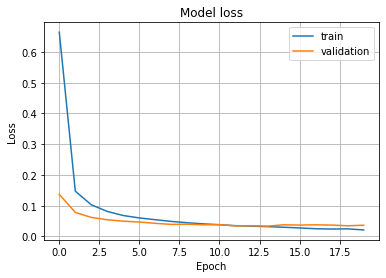

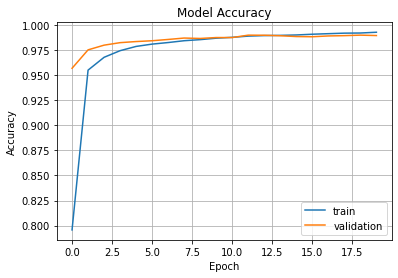

In [137]:
df_loss.plot(title='Model loss', figsize=(6,4), grid=True).set(xlabel='Epoch', ylabel='Loss')
df_acc.plot(title='Model Accuracy', figsize=(6,4), grid=True).set(xlabel='Epoch', ylabel='Accuracy')

## Test set errors

In [138]:
# Predict the test values
pred_y = conv_model.predict(test_X)
# Convert predictions classes to one hot vectors 
pred_y_classes = np.argmax(pred_y, axis = 1)
test_yy = np.argmax(test_y, axis=1)

# Errors are difference between predicted labels and true labels
errors = (pred_y_classes - test_yy != 0)

pred_y_classes_errors = pred_y_classes[errors]
pred_y_errors = pred_y[errors]
true_y_errors = test_yy[errors]
test_x_errors = test_X[errors]

313/313 [==============================] - 1s 2ms/step


total_test_errors:  102


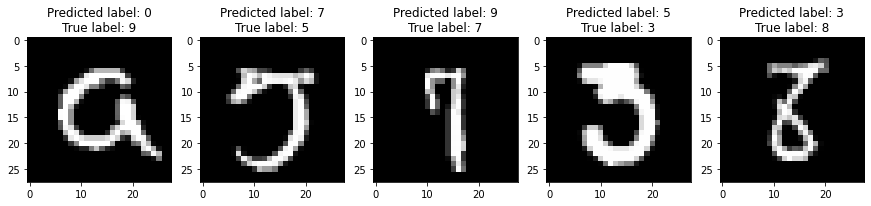

In [144]:
def display_errors(num, img_errors, pred_errors, obs_errors):
    rn = np.random.randint(test_error_num, size=num)
    fig, ax = plt.subplots(1, 5, figsize=(15, 15))
    for col in range(5):
      ax[col].imshow(img_errors[rn[col]].reshape((28,28)), cmap=plt.get_cmap('gray'))
      ax[col].set_title("Predicted label: {}\nTrue label: {}".format(pred_errors[rn[col]],obs_errors[rn[col]]))
test_error_num = test_x_errors.shape[0]
print("total_test_errors: ", test_error_num)
display_errors(5, test_x_errors, pred_y_classes_errors, true_y_errors)

## Predict our samples

In [257]:
img = image.load_img('my.jpg', grayscale=True)
img = image.img_to_array(img)
pred = conv_model.predict(img[None,...])
pred_classes = np.argmax(pred, axis = 1)

1/1 [==============================] - 0s 19ms/step


It's 1.0% a 3


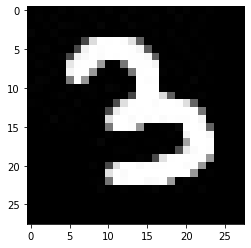

In [258]:
plt.imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))
print("It's {}% a {}".format(pred[0, pred_classes][0], pred_classes[0]))